### Regression Exercise 
# Moneyball The NBA

##### Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt


# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
nba_train = pd.read_csv('data/NBA_train.csv')
nba_test = pd.read_csv('data/NBA_test.csv')

# DISPLAY THE FIRST 5 ROWS
print(nba_train.head())
print(nba_test.head())

   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   3P  3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV  
0  3248  6952   13   75  2038  2645  1369  2406  1913  782  539  1495  
1  3455  6965  162  422  1907  2449  1227  2457  2198  809  308  1539  
2  3292  6668   70  275  2019  2592  1115  2465  2152  704  392  1684  
3  3775  7854   36  187  1702  2205  1307  2381  2108  764  342  1370  
4  3379  7215   83  255  1871  2539  1311  2524  2079  746  404  1533  
   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       2013        Atlanta 

#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
nba_train.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


#### Check for Nulls.

In [4]:
# Check for Nulls.
null_count = nba_train.isnull().sum()
print(null_count)

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64


#### Check for Duplicates

In [5]:
# Check for Duplicates
dup_count = nba_train.duplicated().sum()
print(dup_count)

0


#### Build a function that will do this for you for any data frame you pass into it.

In [6]:
def inspect(df):
    print('\n', '#'*79)
    print('CHECKING SHAPE AND SIZE:  df.shape', df.shape)
    print('\n', '#'*79)
    print( "CHEKCING NULLS", "print(df.isnull().sum())")
    print(df.isnull().sum())

    print('\n', '#'*79)
    print("CHECKING DUPES, df.duplicated().sum()")
    print(df.duplicated().sum())

inspect(nba_train)


 ###############################################################################
CHECKING SHAPE AND SIZE:  df.shape (835, 20)

 ###############################################################################
CHEKCING NULLS print(df.isnull().sum())
SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

 ###############################################################################
CHECKING DUPES, df.duplicated().sum()
0


#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

<Axes: xlabel='W', ylabel='Team'>

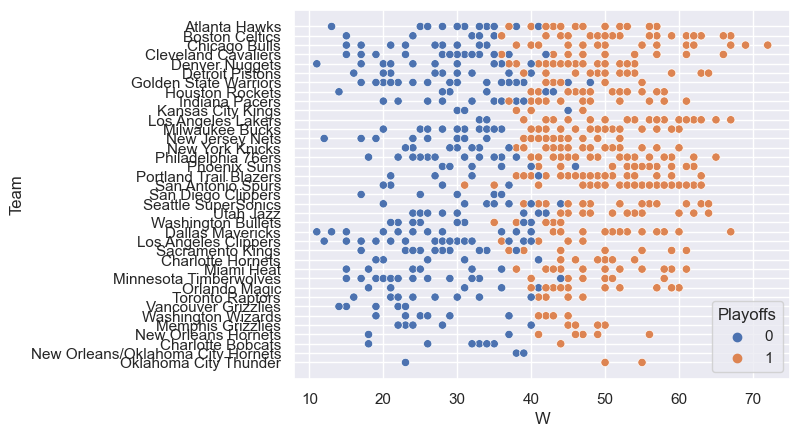

In [7]:
sns.set()
sns.scatterplot(data=nba_train, x='W', y='Team', hue='Playoffs')

#### Take a rough estimate, and now use that moving forward.  



In [8]:
WINS_NEED_TO_MAKE_PLAYOFFS = 46

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

### Hypothesis: Score more than you concede?

<Axes: xlabel='pts_dif', ylabel='W'>

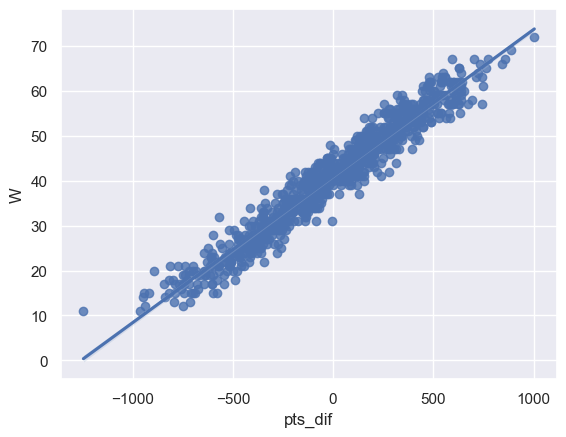

In [9]:
# Create column for points difference
nba_train["pts_dif"] = nba_train["PTS"] - nba_train["oppPTS"]
sns.regplot(nba_train, x="pts_dif", y="W")

In [10]:
# Use linear regression ot verify model
X = nba_train['pts_dif']
y = nba_train['W']

X = sm.add_constant(X)

model_wins = sm.OLS(y, X).fit()
y_pred = model_wins.predict(X)

results = model_wins.summary()
print(results)

root_mean_squared_error = rmse(y, y_pred)
print(y.mean(), root_mean_squared_error, ((root_mean_squared_error / y.mean())*100).round(2))

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:33:35   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0000      0.106    387.027      0.0

* Average Wins: 41.0
* RMSE: 3.06
* % off average: 7.46%

In [11]:
coef_y_int = model_wins.params['const']
coef_pts_dif = model_wins.params['pts_dif']

print(coef_y_int, coef_pts_dif)

# When does pts_dif make wins >= WINS_NEED_TO_MAKE_PLAYOFFS
min_pts_dif = (WINS_NEED_TO_MAKE_PLAYOFFS - coef_y_int) / coef_pts_dif
min_pts_dif

40.99999999999999 0.032586332821132886


153.4385604985108

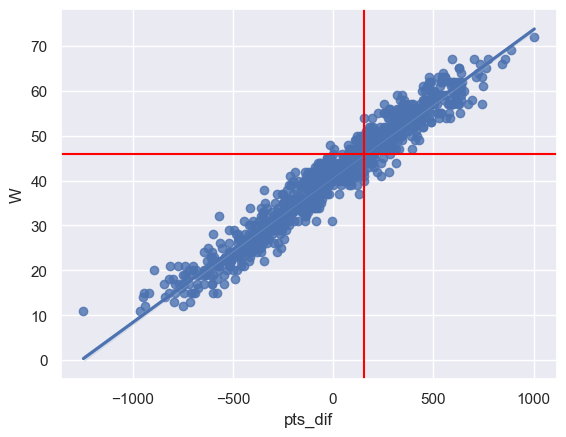

In [12]:
ax = sns.regplot(nba_train, x='pts_dif', y='W')
ax.axvline(x=min_pts_dif, color='red')
ax.axhline(y=WINS_NEED_TO_MAKE_PLAYOFFS, color='red')

### Conlusion: Need to have a points difference of +153.4 to win 46 games and make it to the playoffs.

### Next: Determine which features are important

In [13]:
print(nba_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SeasonEnd  835 non-null    int64 
 1   Team       835 non-null    object
 2   Playoffs   835 non-null    int64 
 3   W          835 non-null    int64 
 4   PTS        835 non-null    int64 
 5   oppPTS     835 non-null    int64 
 6   FG         835 non-null    int64 
 7   FGA        835 non-null    int64 
 8   2P         835 non-null    int64 
 9   2PA        835 non-null    int64 
 10  3P         835 non-null    int64 
 11  3PA        835 non-null    int64 
 12  FT         835 non-null    int64 
 13  FTA        835 non-null    int64 
 14  ORB        835 non-null    int64 
 15  DRB        835 non-null    int64 
 16  AST        835 non-null    int64 
 17  STL        835 non-null    int64 
 18  BLK        835 non-null    int64 
 19  TOV        835 non-null    int64 
 20  pts_dif    835 non-null    int64

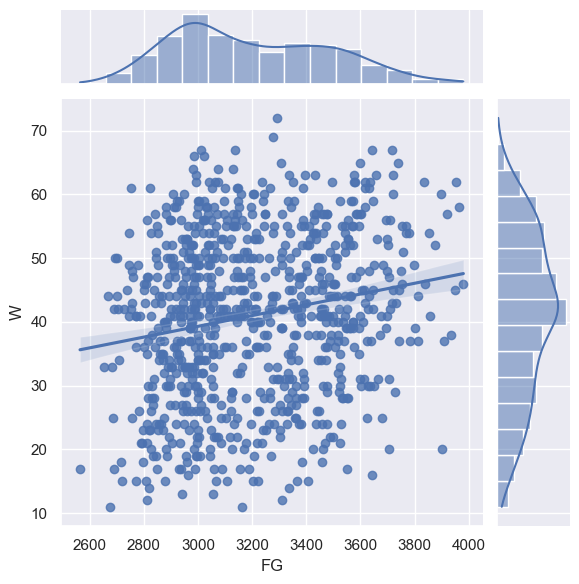

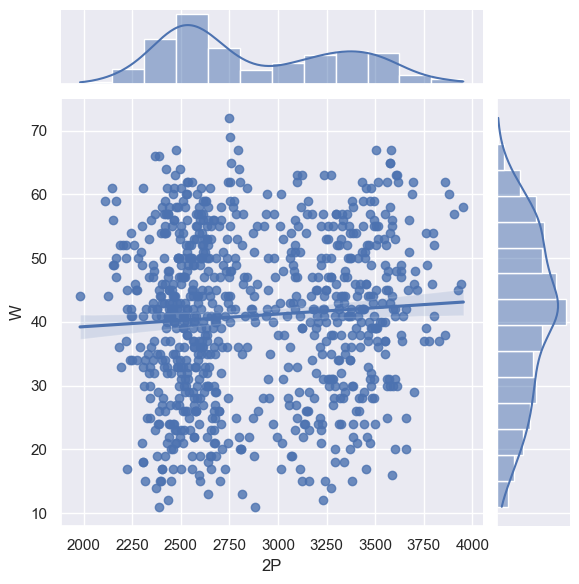

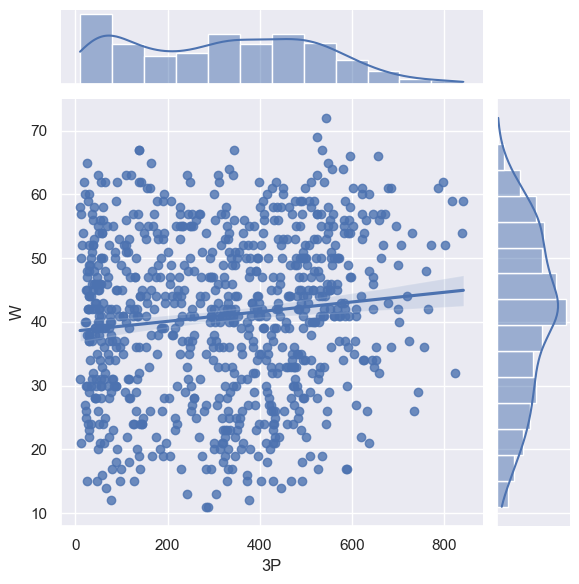

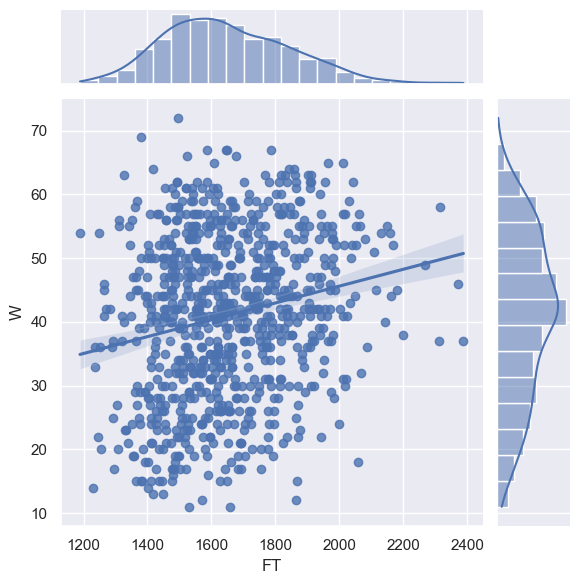

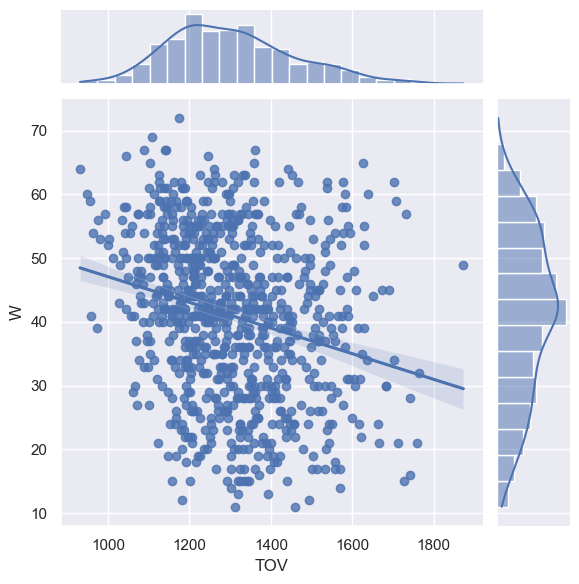

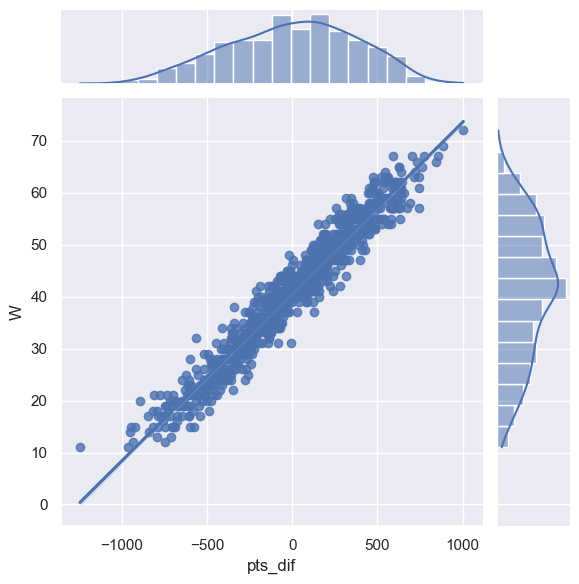

In [14]:
possible_cols = ['FG', '2P', '3P', 'FT', 'TOV', 'pts_dif']
for col in possible_cols:
    sns.jointplot(data=nba_train, x=col, y='W', kind='reg')


### Predicting Points Scored

In [15]:
'''
P-Values

FG => 0
2P => 0
3P => 0
FT => 0
ORB => 0
DRB => 0
STL => 0.264
AST => 0.158
BLK => 0.001
'''

X = nba_train[['FG', 'DRB', 'BLK']]
y = nba_train['PTS']

print(y.mean())
X = sm.add_constant(X)

model_points_scored = sm.OLS(y, X).fit()

print(model_points_scored.summary())

y_pred = model_points_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print(root_mean_squared_error)

root_mean_squared_error / y.mean()

8370.239520958085
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2369.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:33:40   Log-Likelihood:                -5556.7
No. Observations:                 835   AIC:                         1.112e+04
Df Residuals:                     831   BIC:                         1.114e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1362.4617    141.163  

0.022446439775205374

In [16]:
# Should be close to zero
model_points_scored.resid.mean()

-3.0062339843033315e-12

array([[<Axes: title={'center': 'FG'}>, <Axes: title={'center': 'DRB'}>],
       [<Axes: title={'center': 'BLK'}>, <Axes: >]], dtype=object)

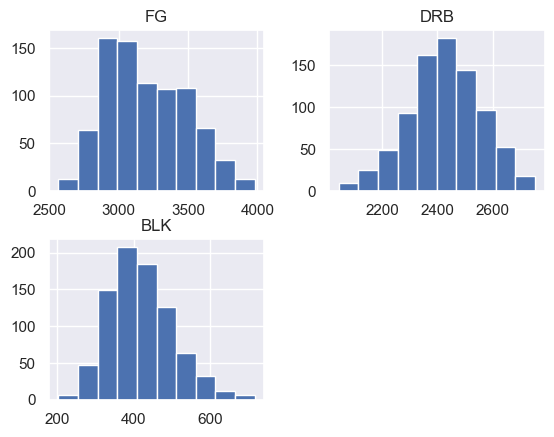

In [17]:
nba_train[['FG', 'DRB', 'BLK']].hist()

### Prediciting Opponent Points Scored

In [18]:
# check data for nulls and duplicates
inspect(nba_train)


 ###############################################################################
CHECKING SHAPE AND SIZE:  df.shape (835, 21)

 ###############################################################################
CHEKCING NULLS print(df.isnull().sum())
SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
pts_dif      0
dtype: int64

 ###############################################################################
CHECKING DUPES, df.duplicated().sum()
0


In [22]:
X = nba_train[['TOV', 'ORB']]
y = nba_train['oppPTS']

X = sm.add_constant(X)

model_opponent_scored = sm.OLS(y, X).fit()
print(model_opponent_scored.summary())

y_pred = model_opponent_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print(root_mean_squared_error)

root_mean_squared_error / y.mean()

                            OLS Regression Results                            
Dep. Variable:                 oppPTS   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     297.7
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.98e-98
Time:                        16:20:59   Log-Likelihood:                -6282.9
No. Observations:                 835   AIC:                         1.257e+04
Df Residuals:                     832   BIC:                         1.259e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4995.7445    140.067     35.667      0.0

0.05355788173793697

In [24]:
# This should be near 0
model_opponent_scored.resid.mean()

4.487566672220915e-12

### Projections for 2013 Miami Heat Team

In [31]:
df = nba_train.merge(nba_test, how='outer')
df_miami = df[ df['Team'] == 'Miami Heat' ].copy()

df_miami_2013 = df_miami[df_miami['SeasonEnd']==2013].copy()

df_miami_2013['const'] = 1
df_miami_2013

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,pts_dif,const
848,2013,Miami Heat,1,66,8436,7791,3148,6348,2431,4539,...,1423,1887,676,2490,1890,710,441,1143,NaN,1


In [33]:
PS_2013 = model_points_scored.predict(df_miami_2013[['const' ,'FG', 'DRB', 'BLK']])
predicted_points_scored = PS_2013.values[0]
print('Predicted points scored for Miami in 2013:', predicted_points_scored)

Predicted points scored for Miami in 2013: 8289.441744636564


In [34]:
PC_2013 = model_opponent_scored.predict( df_miami_2013[['const', 'TOV', 'ORB']] )
predicted_points_conceded = PC_2013.values[0]
print('Predicted points CONCEDED for Miami in 2013:', predicted_points_conceded)

Predicted points CONCEDED for Miami in 2013: 7623.457493418116


In [35]:
pts_dif = predicted_points_scored - predicted_points_conceded
WINS_2013 = model_wins.predict([1, pts_dif])

predicted_wins = WINS_2013[0]
print('Predicted WINS for Miami in 2013:',predicted_wins )

Predicted WINS for Miami in 2013: 62.701984463837306


In [36]:
pred_dict = {
    'predicted_PS': predicted_points_scored,
    'predicted_PC': predicted_points_conceded,
    'predicted_W': predicted_wins
}
df_pred = pd.DataFrame.from_dict([pred_dict])
df_pred

,predicted_PS,predicted_PC,predicted_W
0,8289.441745,7623.457493,62.701984


In [37]:
def predict_wins(team, year):
    df = nba_train.merge(nba_test, how='outer')
    df['const']=1
    df = df[ df['Team'] == team]
    df = df[ df['SeasonEnd'] == year]
    
    points_scored = model_points_scored.predict(df[['const' ,'FG', 'DRB', 'BLK']])
    points_conceded = model_opponent_scored.predict( df[['const', 'TOV', 'ORB']] )
    pts_dif = points_scored-points_conceded
    pred = model_wins.predict([1, pts_dif])
    return(pred)

predict_wins("New York Knicks", 2013)

c:\Users\lfcle\anaconda3\lib\site-packages\statsmodels\base\model.py:1153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  exog = np.asarray(exog)


array([852    52.416792
       dtype: float64  ], dtype=object)